In [1]:
def find_inverse(a, m):
    a_inv = 1
    while True:
        if (a_inv * a - 1) % m != 0:
            a_inv+=1
        else:
            return a_inv

In [5]:
find_inverse(3, 7)

5

In [20]:
def extnd_euqlid(a,b):
    if a>b:
        r0 = a
        r1 = b
    elif b>a:
        r0 = b
        rq = a
    elif a==b:
        return [a, b, 1, 0, 1, 0]
    q1 = r0//r1
    r2 = r0 - q1*r1
    q2 = r1//r2
    r3 = r1 - q2*r2
    matrix = [[r0, r1, q1, r2, 1, 0], [r1, r2, q2, r3, 0, 1]]
    if r3 == 0:
        return matrix
    i = 1
    while True:
        q = matrix[i][1]//matrix[i][3]
        r = matrix[i][1] - q*matrix[i][3]
        s = matrix[i-1][-2] - matrix[i][-2]*matrix[i-1][2]
        t = matrix[i-1][-1] - matrix[i][-1]*matrix[i-1][2]
        iteration = [matrix[i][1],matrix[i][3],q,r,s,t]
        matrix.append(iteration)
        i+=1
        print(iteration)
        if r==0:
            s = matrix[i-1][-2] - matrix[i][-2]*matrix[i-1][2]
            t = matrix[i-1][-1] - matrix[i][-1]*matrix[i-1][2]
            matrix.append([0, 0, 0, 0, s, t])
            return matrix

In [23]:
extnd_euqlid(252,198)

[54, 36, 1, 18, 1, -1]
[36, 18, 2, 0, -3, 4]


[[252, 198, 1, 54, 1, 0],
 [198, 54, 3, 36, 0, 1],
 [54, 36, 1, 18, 1, -1],
 [36, 18, 2, 0, -3, 4],
 [0, 0, 0, 0, 4, -5]]

In [1]:
800 - 6*50 + 100 -5

595

In [6]:
from sympy import*

In [7]:
x = symbols('x')

In [21]:
k = (x**4+1)/(x+1)
k.simplify()

(x**4 + 1)/(x + 1)

In [17]:
l = (x+1)*(x**5+2).expand()
l = l.expand()

In [22]:
2+2+15

19

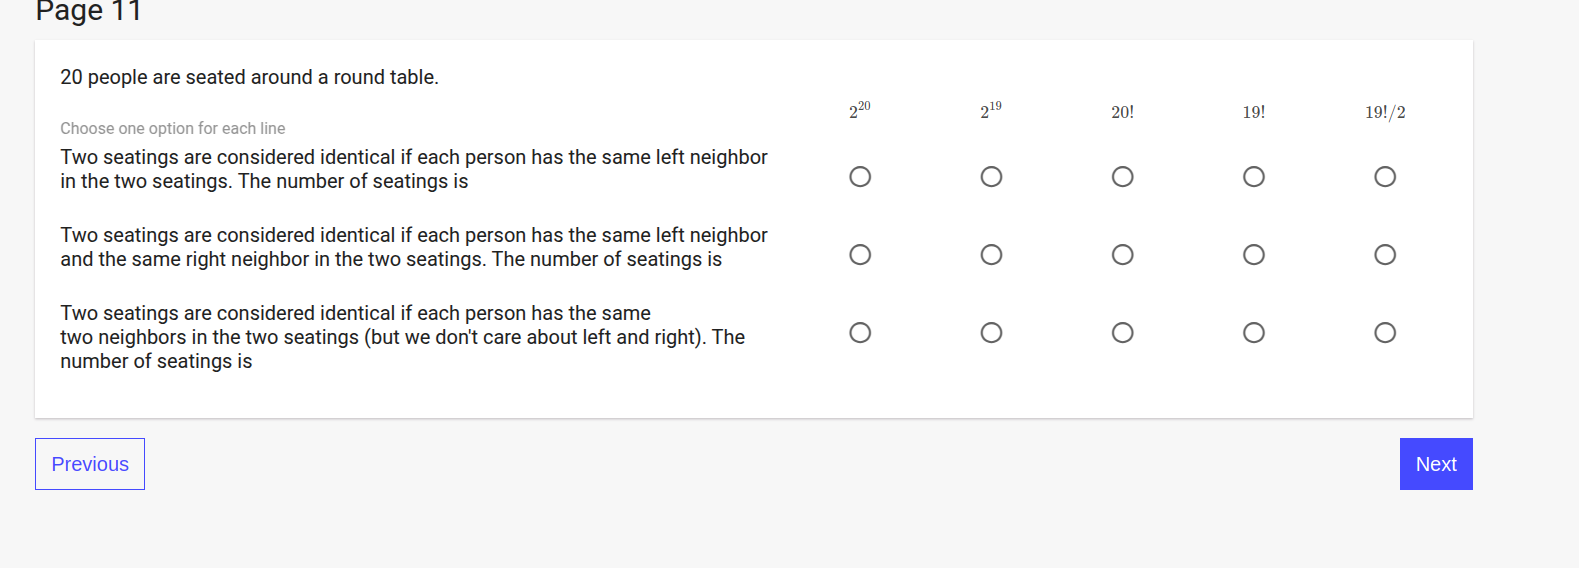

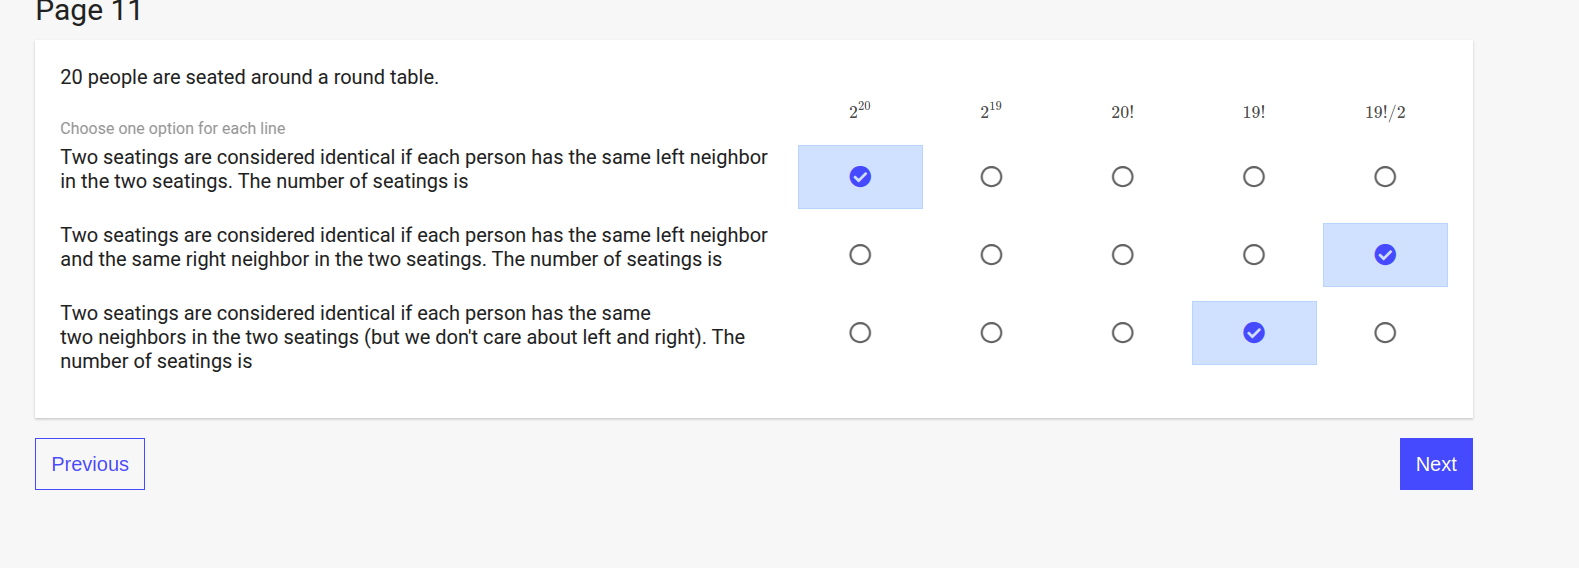

In [23]:
f = 2*x+16

In [24]:
f.subs({x:4})

24

In [26]:
import math

def map_with_exponential(value, in_min, in_max, out_min, out_max, exp_factor=1):
    # Normalize the input to [0, 1]
    normalized = (value - in_min) / (in_max - in_min)
    # Apply exponential transformation
    exponential_scaled = (math.exp(exp_factor * normalized) - 1) / (math.exp(exp_factor) - 1)
    # Map to the output range
    return exponential_scaled * (out_max - out_min) + out_min


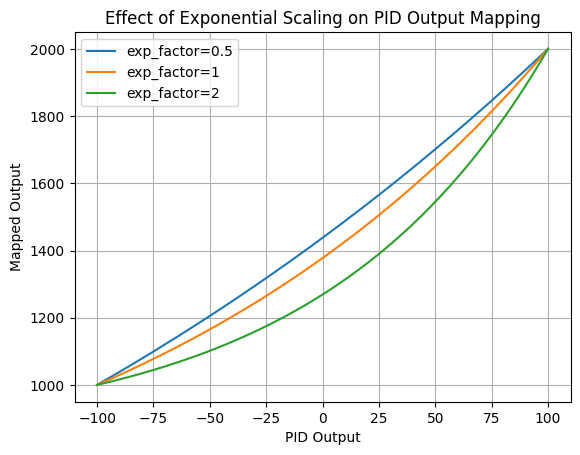

In [27]:
import matplotlib.pyplot as plt

in_min, in_max = -100, 100
out_min, out_max = 1000, 2000
values = range(in_min, in_max + 1)
exp_factors = [0.5, 1, 2]

for exp_factor in exp_factors:
    outputs = [map_with_exponential(v, in_min, in_max, out_min, out_max, exp_factor) for v in values]
    plt.plot(values, outputs, label=f'exp_factor={exp_factor}')

plt.xlabel('PID Output')
plt.ylabel('Mapped Output')
plt.legend()
plt.title('Effect of Exponential Scaling on PID Output Mapping')
plt.grid()
plt.show()


In [28]:
def polynomial_s_curve(value, in_min, in_max, out_min, out_max):
    # Normalize input to [0, 1]
    normalized = (value - in_min) / (in_max - in_min)
    
    #cubic S-curve formula
    s_curve = 3 * normalized**2 - 2 * normalized**3
    
    # Map to output range
    return s_curve * (out_max - out_min) + out_min


In [29]:
import math

def s_curve_mapping(value, in_min, in_max, out_min, out_max, k=1):
    # Normalize input to [-1, 1]
    normalized = (value - in_min) / (in_max - in_min) * 2 - 1
    
    # Apply sigmoid function
    sigmoid = 1 / (1 + math.exp(-k * normalized))
    
    # Map sigmoid output to desired range
    return sigmoid * (out_max - out_min) + out_min


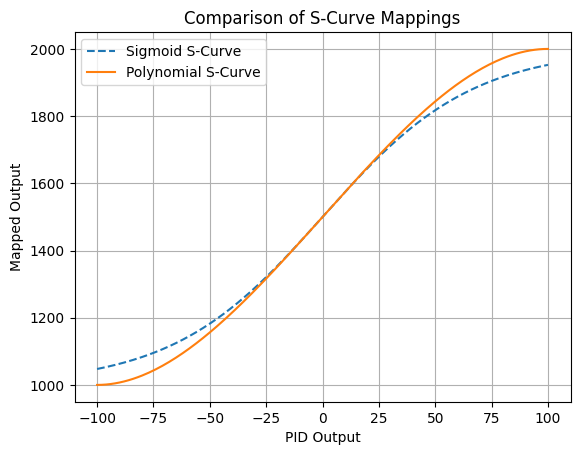

In [40]:
import matplotlib.pyplot as plt

in_min, in_max = -100, 100
out_min, out_max = 1000, 2000
values = range(in_min, in_max + 1)

# Generate outputs for sigmoid and polynomial S-curves
sigmoid_outputs = [s_curve_mapping(v, in_min, in_max, out_min, out_max, k=3) for v in values]
polynomial_outputs = [polynomial_s_curve(v, in_min, in_max, out_min, out_max) for v in values]

# Plot
plt.plot(values, sigmoid_outputs, label='Sigmoid S-Curve', linestyle='--')
plt.plot(values, polynomial_outputs, label='Polynomial S-Curve', linestyle='-')
plt.xlabel('PID Output')
plt.ylabel('Mapped Output')
plt.legend()
plt.title('Comparison of S-Curve Mappings')
plt.grid()
plt.show()
